# Hawking effect as a Symplectic transformation

## In this script a variety of input states (thre mode-states) are created and transformed by the symplectic operation corresponding to the Hawking process. After the transformation, some properties are computed.

##### qgt used as a module.py file



In [2]:
import sys
sys.path.append('..')
import numpy as np
import qgt
import matplotlib.pyplot as plt

In [3]:
# First, we define the Hawking process
# InState is the input state
# omega is the frequency of the outgoing mode
# T is the temperature of the black hole
# gamma is the transmission amplitude of the beam splitter (Greybody factor)

# The Hawking process is defined as a two-mode squeezing operation followed by a beam splitter

def HawkingProcess(InState, omega, T, gamma):
    r=np.arctanh(np.sqrt(np.exp(-omega/T)))
    InState.two_mode_squeezing(r,0,[0,2])       #Squeezing in the first and third mode (a_{w;1}^{(in)} and a_{w;2}^{(in)})
    InState.beam_splitter(gamma,[1,2])          #Beam_splitter acting on the second and third mode (b_{w}^{(in)} and a_{w;2}^{(in)})

In [3]:
# For a vacuum input state we obtain its covariance matrix after the process and the mean number of particles in the outgoing mode
# For our purposes we will select the tempeature of the black hole to match the frequency of the outgoing mode
# Then, the value obtained will be for each frequency being the most probable one

InState=qgt.Gaussian_state("vacuum", 3)
omega = 1
T = omega
gamma = 1

# First, we calculate the covariance matrix for fixed frequency and fixed gamma 
# Then, we calculate the mean number of particles in the outgoing mode

HawkingProcess(InState, omega, T, gamma)

# Covariance matrix of the outgoing state
cov = InState.V
cov = cov[-2:, -2:]


# Mean number of particles in the outgoing mode
n = InState.occupation_number()[2]

print("Covariance matrix of the outgoing state")
print(cov)
print("Mean number of particles in the outgoing mode")
print(n)

# Expected value for the mean number of particles in the outgoing mode
# We can compare this value with the one obtained from the simulation
n_exp = gamma/(np.exp(omega/T)-1)
print("Expected value for the mean number of particles in the outgoing mode")
print(n_exp)



Covariance matrix of the outgoing state
[[2.16395341 0.        ]
 [0.         2.16395341]]
Mean number of particles in the outgoing mode
[0.58197671]
Expected value for the mean number of particles in the outgoing mode
0.5819767068693265


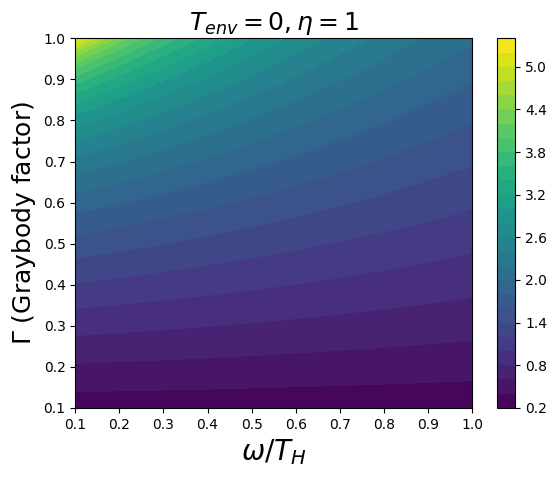

In [11]:
# Now we will calculate the logarithmic negativity between modes 0 and 2
# We will consider the case of a vacuum input state
# We will produce a contour plot of the logarithmic negativity as a function of the frequency of the outgoing mode and the transmission amplitude of the beam splitter

# We will consider a range of frequencies and transmission amplitudes
omega = np.linspace(0.1, 1, 100)
gamma = np.linspace(0.1, 1, 100)
X, Y = np.meshgrid(omega, gamma)
T = 1

# We will store the values of the logarithmic negativity in a matrix
log_neg = np.empty_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        InState=qgt.Gaussian_state("vacuum", 3)
        HawkingProcess(InState, X[i, j], T, Y[i,j])
        log_neg[i,j] = InState.logarithmic_negativity([0],[2])

# We plot the contour plot
plt.contourf(omega, gamma, log_neg, levels=30)
plt.colorbar()
plt.xlabel(r"$\omega / T_{H}$", fontsize = 20)
plt.ylabel(r"$\Gamma$ (Graybody factor)", fontsize = 18)
plt.title("$T_{env} = 0, \eta = 1$", fontsize = 18)
plt.savefig("log_neg_noT_noeta.png")
plt.show()

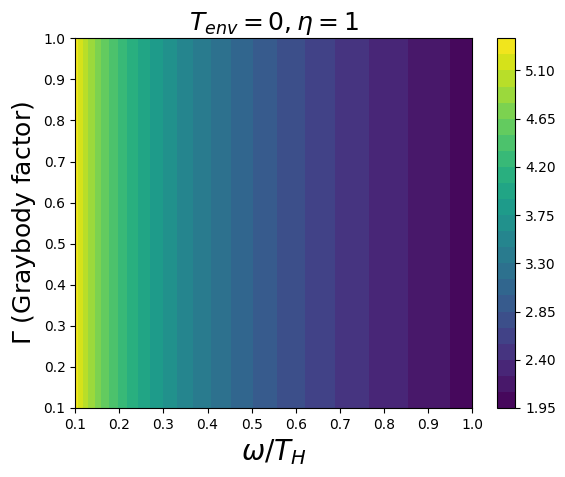

In [10]:
# Now we will calculate the logarithmic negativity between modes 0 and 1,2
# We will consider the case of a vacuum input state
# We will produce a contour plot of the logarithmic negativity as a function of the frequency of the outgoing mode and the transmission amplitude of the beam splitter

# We will consider a range of frequencies and transmission amplitudes
omega = np.linspace(0.1, 1, 100)
gamma = np.linspace(0.1, 1, 100)
X, Y = np.meshgrid(omega, gamma)
T = 1

# We will store the values of the logarithmic negativity in a matrix
log_neg = np.empty_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        InState=qgt.Gaussian_state("vacuum", 3)
        HawkingProcess(InState, X[i, j], T, Y[i,j])
        log_neg[i,j] = InState.logarithmic_negativity([0],[1,2])

# We plot the contour plot
plt.contourf(omega, gamma, log_neg, levels=30)
plt.colorbar()
plt.xlabel(r"$\omega / T_{H}$", fontsize = 20)
plt.ylabel(r"$\Gamma$ (Graybody factor)", fontsize = 18)
plt.title("$T_{env} = 0, \eta = 1$", fontsize = 18)
plt.savefig("log_neg_joint_HAWKING1.png")
plt.show()


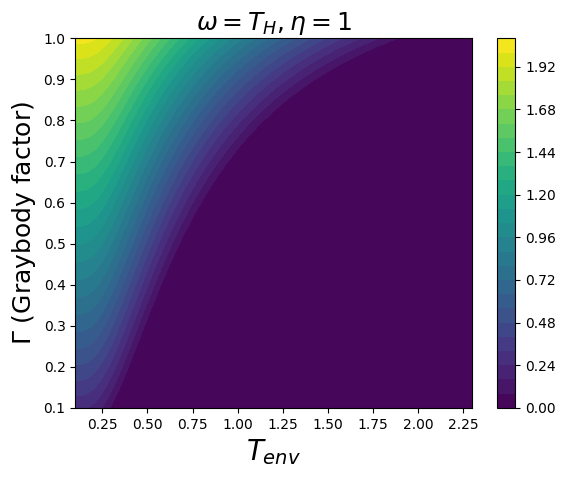

In [16]:
# Now we will introduce thermal fluctuations and graybody factor with no attenuation

# We will calculate the logarithmic negativity between modes 0 and 2
# We will consider the case of a vacuum input state

# generate a range of environmental temperatures and graybody factors
T = np.linspace(0.1, 2.3, 100)
gamma = np.linspace(0.1, 1, 100)

X, Y = np.meshgrid(T, gamma)
k = 1 # k represents the fraction omega/TH

# We will store the values of the logarithmic negativity in a matrix
log_neg = np.empty_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        n = 1/(np.exp(1/(k*X[i,j]))-1)
        InState=qgt.elementary_states("thermal",[n,2*n,n])
        HawkingProcess(InState, 1, k, Y[i,j])
        log_neg[i,j] = InState.logarithmic_negativity([0],[2])

# We plot the contour plot
plt.contourf(T, gamma, log_neg, levels=30)
plt.colorbar()
plt.xlabel(r"$T_{env}$", fontsize = 20)
plt.ylabel(r"$\Gamma$ (Graybody factor)", fontsize = 18)
plt.title("$\omega = T_{H}, \eta = 1$", fontsize = 18)

#plt.savefig("log_neg_T_graybody_noeta_non_iso.png")

plt.show()

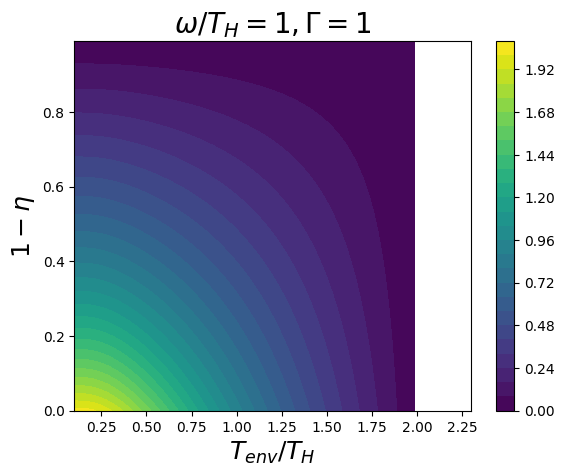

In [13]:
# Now we fix gamma to 1 and omega/TH to 1
# Then we start with an isotropic thermal state as input
# We will also include the effect of the attenuation
# We will contour plot the log neg as a function of the environment temperature and the attenuation

# Consider a range of temperatures and attenuations
T = np.linspace(0.1, 2.3, 100) # T is Tenv/TH
eta = np.linspace(0.01, 1, 100)

# Store the values of the logarithmic negativity in a matrix
X, Y = np.meshgrid(T, eta)

log_neg = np.empty_like(X)
k = 1 # k represents the fraction omega/TH

# Calculate the log neg for each value of T and eta
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        n = 1/(np.exp(1/(k*X[i,j]))-1)
        InState=qgt.Gaussian_state("thermal", 3, n)
        HawkingProcess(InState, 1, k, 1)
        InState.attenuation(Y[i,j])
        log_neg[i,j] = InState.logarithmic_negativity([0],[2])

# Define un umbral para los valores que consideras "muy próximos a cero"
threshold = 1e-11

# Reemplaza los valores en log_neg que son menores que el umbral con np.nan
log_neg = np.where(np.abs(log_neg) < threshold, np.nan, log_neg)

# Plot the contour plot
plt.contourf(T, 1-eta, log_neg, levels=30)

plt.colorbar()
plt.xlabel(r"$T_{env}/T_{H}$", fontsize=18)
plt.ylabel(r"$1-\eta$", fontsize=18)
plt.title("$\omega / T_{H} = 1, \Gamma = 1$", fontsize = 20)

plt.savefig("log_neg_threshold_HAWKING2.png")
plt.show()



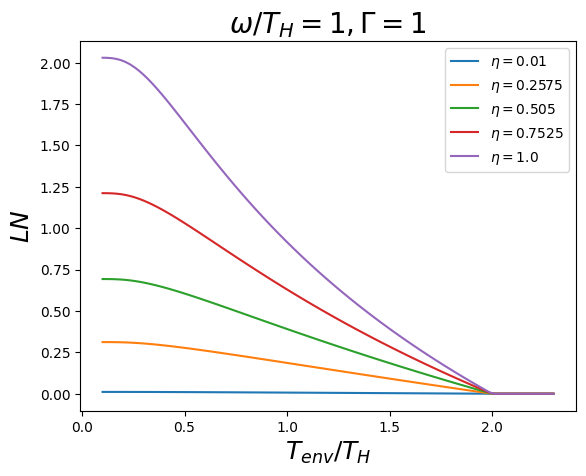

In [15]:
# the same as before but we plot some lines for fixed values of attenuation
# Consider a range of temperatures and attenuations
T = np.linspace(0.1, 2.3, 100) # T is Tenv/TH
eta = np.linspace(0.01, 1, 5) # 5 fixed values of eta

# Store the values of the logarithmic negativity in a list with 5 elements
log_neg = [np.empty_like(T) for i in range(5)]
k = 1 # k represents the fraction omega/TH

# Calculate the log neg for each value of T and eta
for i in range(len(eta)):
    for j in range(T.shape[0]):
        n = 1/(np.exp(1/(k*T[j]))-1)
        InState=qgt.Gaussian_state("thermal", 3, n)
        HawkingProcess(InState, 1, k, 1)
        InState.attenuation(eta[i])
        log_neg[i][j] = InState.logarithmic_negativity([0],[2])

# Plot the five lines in the same figure

for i in range(5):
    plt.plot(T, log_neg[i], label = r"$\eta = $" + str(eta[i]))

plt.xlabel(r"$T_{env}/T_{H}$", fontsize=18)
plt.ylabel(r"$LN$", fontsize=18)
plt.title("$\omega / T_{H} = 1, \Gamma = 1$", fontsize = 20)
plt.legend()

plt.savefig("log_neg_lines_HAWKING2.png")

plt.show()

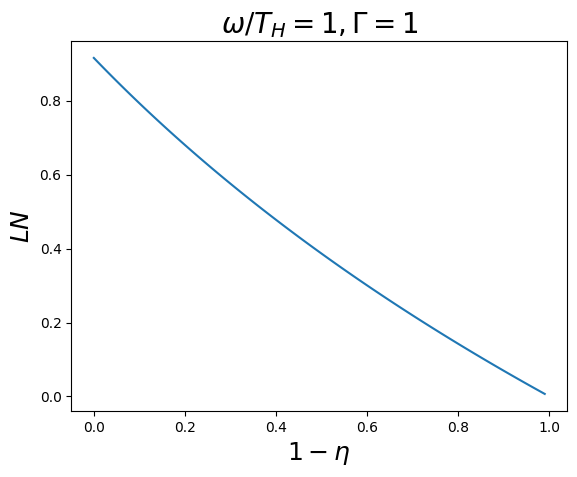

In [16]:
# Now the same as before but set the thermal attenuation (the temperature) to 0

# Consider a range of attenuations

eta = np.linspace(0.01, 1, 100) # 100 fixed values of eta

# Store the values of the logarithmic negativity in a list

log_neg = np.empty_like(eta)

k = 1 # k represents the fraction omega/TH

# Calculate the log neg for each value of T and eta

for i in range(eta.shape[0]):
    n = 1/(np.exp(1/(k))-1)
    InState=qgt.Gaussian_state("thermal", 3, n)
    HawkingProcess(InState, 1, k, 1)
    InState.attenuation(eta[i])
    log_neg[i] = InState.logarithmic_negativity([0],[2])

# Plot the line

plt.plot(1-eta, log_neg)

plt.xlabel(r"$1-\eta$", fontsize=18)
plt.ylabel(r"$LN$", fontsize=18)
plt.title("$\omega / T_{H} = 1, \Gamma = 1$", fontsize = 20)

plt.savefig("log_neg_line_HAWKING2_attenuation.png")

plt.show()


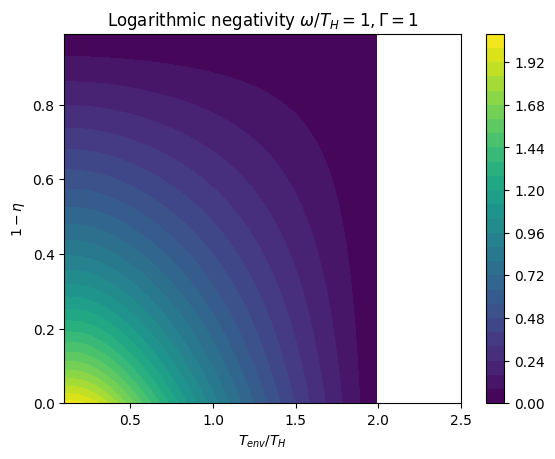

In [7]:
# The same than before but we consider a more realistic thermal fluctuations
# Now we fix gamma to 1 and omega/TH to 1
# Then we start with thermal state with n=0.1*nb as input for modes 0 and 2 and n=nb for mode 1
# We will also include the effect of the attenuation
# We will contour plot the log neg as a function of the environment temperature and the attenuation

# Consider a range of temperatures and attenuations
T = np.linspace(0.1, 2.5, 100) # T is Tenv/TH
eta = np.linspace(0.01, 1, 100)

# Store the values of the logarithmic negativity in a matrix
X, Y = np.meshgrid(T, eta)

log_neg = np.empty_like(X)

# Calculate the log neg for each value of T and eta
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        n = 1/(np.exp(1/X[i,j])-1)
        InState=qgt.elementary_states("thermal", [n, 10*n, n])
        HawkingProcess(InState, 1, 1, 1)
        InState.attenuation(Y[i,j])
        log_neg[i,j] = InState.logarithmic_negativity([0],[2])

# Define a threshold for the values that you consider "very close to zero"
threshold = 1e-11

# Change the values in log_neg that are less than the threshold to np.nan
log_neg = np.where(np.abs(log_neg) < threshold, np.nan, log_neg)

# Plot the contour plot
plt.contourf(T, 1-eta, log_neg, levels=30)

plt.colorbar()
plt.xlabel(r"$T_{env}/T_{H}$")
plt.ylabel(r"$1-\eta$")
plt.title("Logarithmic negativity $\omega / T_{H} = 1, \Gamma = 1$")

plt.savefig("log_neg_threshold_HAWKING2_nonIso.png")

plt.show()

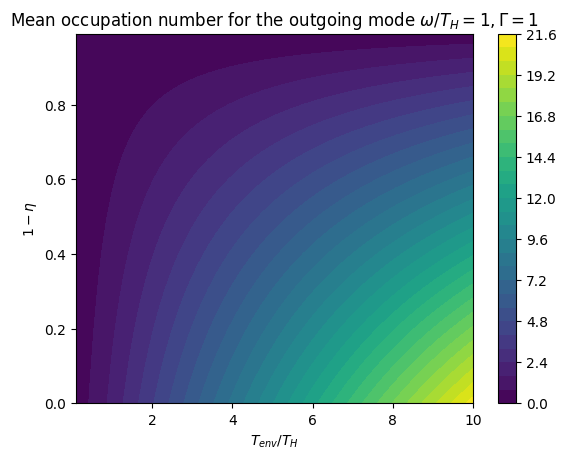

In [8]:
# Now we fix gamma to 1 and omega/TH to 1
# Then we start with an isotropic thermal state as input
# We will also include the effect of the attenuation
# We will contour plot the mean occupation number for the outgoing mode as a function of the environment temperature and the attenuation

# Consider a range of temperatures and attenuations
T = np.linspace(0.1, 10, 100) # T is Tenv/TH
eta = np.linspace(0.01, 1, 100)

# Store the values of the logarithmic negativity in a matrix
X, Y = np.meshgrid(T, eta)

mean_occupation = np.empty_like(X)
k = 1 # k represents the fraction omega/TH

# Calculate the log neg for each value of T and eta
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        n = 1/(np.exp(1/(k*X[i,j]))-1)
        InState=qgt.Gaussian_state("thermal", 3, n)
        HawkingProcess(InState, 1, k, 1)
        InState.attenuation(Y[i,j])
        mean_occupation[i,j] = InState.occupation_number()[2]

# Define un umbral para los valores que consideras "muy próximos a cero"
threshold = 1e-11

# Reemplaza los valores en log_neg que son menores que el umbral con np.nan
mean_occupation= np.where(np.abs(mean_occupation) < threshold, np.nan, mean_occupation)

# Plot the contour plot
plt.contourf(T, 1-eta, mean_occupation, levels=30)

plt.colorbar()
plt.xlabel(r"$T_{env}/T_{H}$")
plt.ylabel(r"$1-\eta$")
plt.title("Mean occupation number for the outgoing mode $\omega / T_{H} = 1, \Gamma = 1$")

#plt.savefig("log_neg_threshold_HAWKING2.png")
plt.show()

In [9]:
# Print the whole covariance matrix of the outgoing state for a vacuum input state with no attenuation

# Consider a range of temperatures and attenuations
T = np.linspace(0.1, 2.5, 5) # T is Tenv/TH

# Store the values of the logarithmic negativity in a matrix

log_neg = np.empty_like(T)

# Calculate the log neg for each value of T and eta
for i in range(len(T)):
    n = 1/(np.exp(1/T[i])-1)
    InState=qgt.elementary_states("thermal", [n, n, n])
    HawkingProcess(InState, 1, 1, 1)
    print("Covariance matrix for State = ", InState.partial_transpose([0]), "\n\n")
    print(InState.partial_transpose([0]).symplectic_eigenvalues(), "\n\n")
    log_neg[i] = InState.logarithmic_negativity([0],[2])
    print("Logarithmic negativity = ", log_neg[i], "\n\n")

Covariance matrix for State =  3-mode gaussian state with mean quadrature vector R =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
and covariance matrix V =
[[2.16414991 0.         0.         0.         1.91920901 0.        ]
 [0.         2.16414991 0.         0.         0.         1.91920901]
 [0.         0.         1.0000908  0.         0.         0.        ]
 [0.         0.         0.         1.0000908  0.         0.        ]
 [1.91920901 0.         0.         0.         2.16414991 0.        ]
 [0.         1.91920901 0.         0.         0.         2.16414991]] 


[[0.2449409 ]
 [1.0000908 ]
 [4.08335892]] 


Logarithmic negativity =  2.0294943892742987 


Covariance matrix for State =  3-mode gaussian state with mean quadrature vector R =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
and covariance matrix V =
[[3.52804728 0.         0.         0.         3.12873895 0.        ]
 [0.         3.52804728 0.         0.         0.         3.12873895]
 [0.         0.         1.63037118 0.         0.      